In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/auto-mpg.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
dataset = dataset.drop(['car name'], axis=1)

In [ ]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [ ]:
dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values() 

cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
horsepower      6
dtype: int64

In [ ]:
dataset.dropna(subset=["horsepower"], axis=0, inplace=True)

In [ ]:
dataset['horsepower'] = dataset.horsepower.astype(int)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [ ]:
dataset.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500.0,17450.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1410a1ac50>,
      dtype=object)

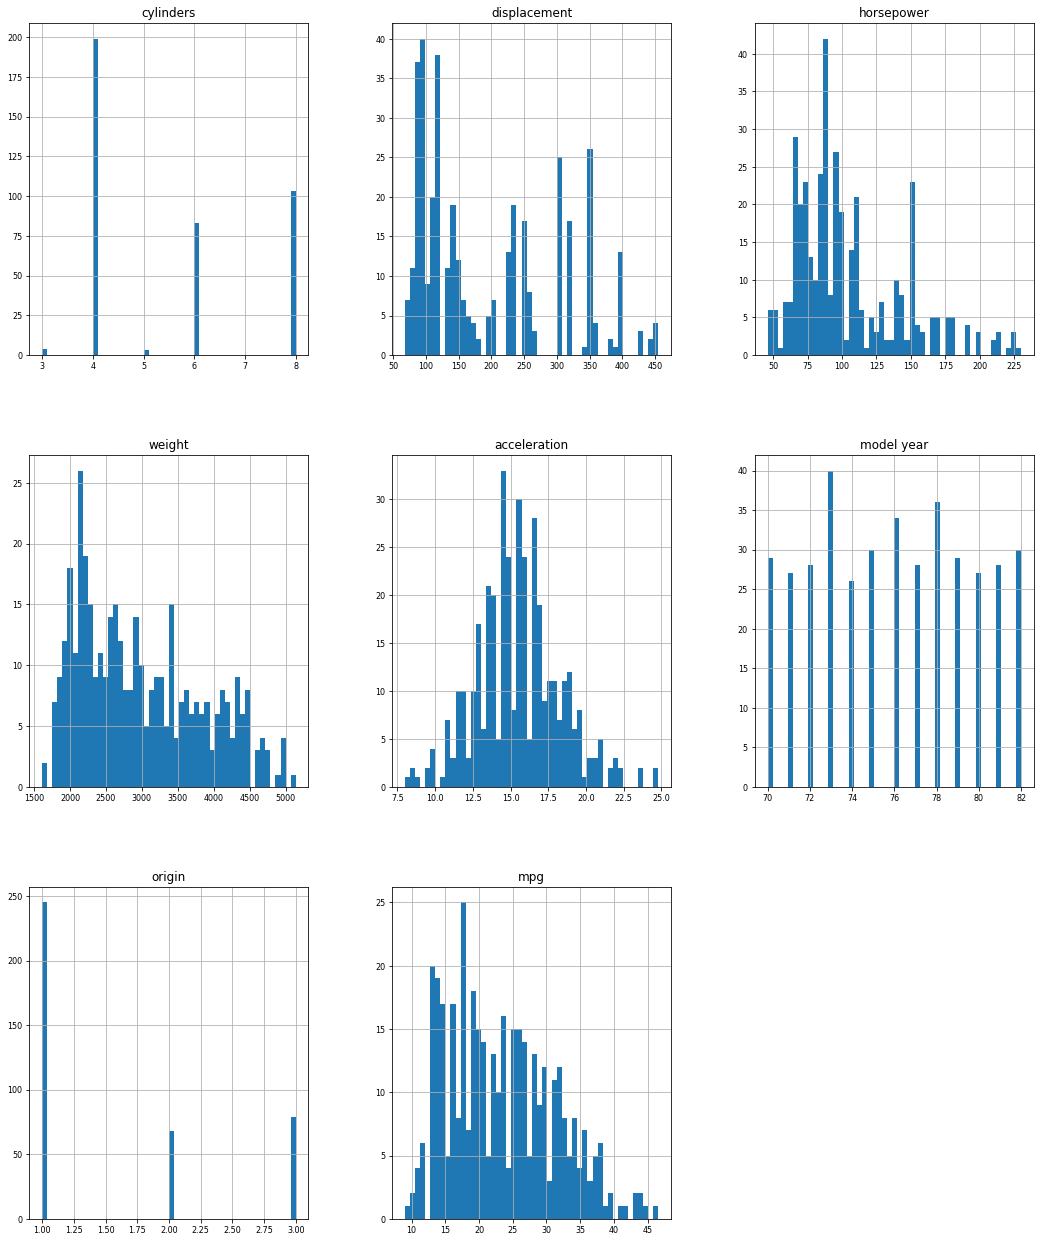

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

corr

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.423329
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.580541
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.565209
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000


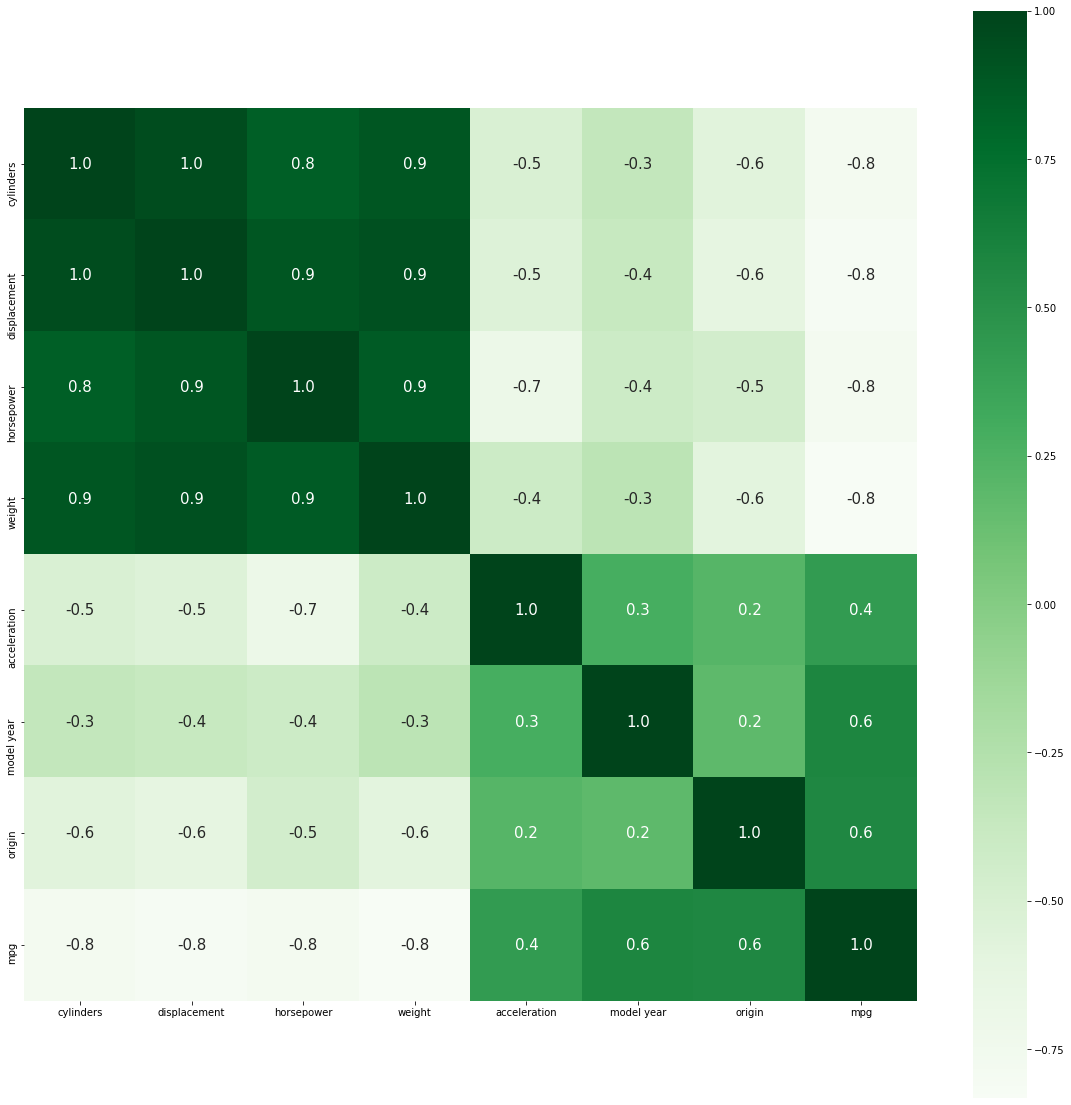

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
label = dataset['mpg']
features = dataset.drop(['mpg'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2173837145152616
MAE (Mean Absolute Error) 0.3420165569616647
r^2 score 0.7847120794656518
RMSE (Root Mean Squared Error 0.4662442648604502


# Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9524 - val_loss: 0.9218
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7814 - val_loss: 0.6518
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.5054 - val_loss: 0.3793
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3063 - val_loss: 0.2692
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2370 - val_loss: 0.2432
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2160 - val_loss: 0.2289
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2010 - val_loss: 0.2151
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1893 - val_loss: 0.2039
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1780 - val_loss: 0.1954
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1685 - val_loss: 0.1848
Epoch 11/50
40/40 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.11937851266749483
MAE (Mean Absolute Error) 0.25009760765985134
r^2 score 0.8817724142492561
RMSE (Root Mean Squared Error 0.345511957343729


# Deeper

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9803 - val_loss: 0.9986
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.8871 - val_loss: 0.7723
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6434 - val_loss: 0.4586
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4310 - val_loss: 0.3251
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2919 - val_loss: 0.2563
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2344 - val_loss: 0.2313
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2152 - val_loss: 0.2165
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1993 - val_loss: 0.2028
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1862 - val_loss: 0.1912
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1730 - val_loss: 0.1780
Epoch 11/50
40/40 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.12437264619778399
MAE (Mean Absolute Error) 0.26296041333339526
r^2 score 0.8768264291049489
RMSE (Root Mean Squared Error 0.35266506234355566


# Wider

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8938 - val_loss: 0.8696
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6334 - val_loss: 0.5464
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3336 - val_loss: 0.2849
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2171 - val_loss: 0.2259
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1971 - val_loss: 0.2127
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1824 - val_loss: 0.1983
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1703 - val_loss: 0.1828
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1636 - val_loss: 0.1761
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1573 - val_loss: 0.1685
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1607
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.11711267910863338
MAE (Mean Absolute Error) 0.2494474713377063
r^2 score 0.8840164029319041
RMSE (Root Mean Squared Error 0.3422172980850521


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.893839,0.869612,0
1,0.633434,0.546416,1
2,0.333574,0.284893,2
3,0.217110,0.225872,3
4,0.197105,0.212750,4
...,...,...,...
95,0.106362,0.115450,95
96,0.107063,0.114155,96
97,0.105625,0.116617,97
98,0.105537,0.115617,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
71,0.108256,0.111838,71
64,0.109385,0.113169,64
78,0.107460,0.113330,78
73,0.108792,0.113478,73
77,0.108730,0.113523,77
...,...,...,...
4,0.197105,0.212750,4
3,0.217110,0.225872,3
2,0.333574,0.284893,2
1,0.633434,0.546416,1


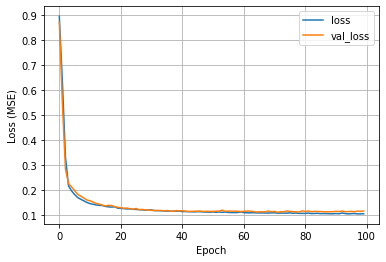

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9558 - val_loss: 0.9544
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7985 - val_loss: 0.7309
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5113 - val_loss: 0.3884
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2647 - val_loss: 0.2442
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2055 - val_loss: 0.2168
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1868 - val_loss: 0.2019
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1756 - val_loss: 0.1916
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1670 - val_loss: 0.1840
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1610 - val_loss: 0.1760
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1557 - val_loss: 0.1698
Epoch 11/

In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
68,0.118010,0.116039,68
69,0.114516,0.117318,69
71,0.113422,0.119422,71
72,0.113994,0.119968,72
79,0.112225,0.120050,79
...,...,...,...
4,0.205474,0.216844,4
3,0.264684,0.244202,3
2,0.511340,0.388384,2
1,0.798470,0.730885,1


In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.12040189611834272
MAE (Mean Absolute Error) 0.24813257640910247
r^2 score 0.8807588972269088
RMSE (Root Mean Squared Error 0.3469897637083012


In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8458 - val_loss: 0.7212
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5688 - val_loss: 0.4384
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3399 - val_loss: 0.2739
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2482 - val_loss: 0.2363
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2162 - val_loss: 0.2131
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1931 - val_loss: 0.1935
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1765 - val_loss: 0.1795
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1644 - val_loss: 0.1744
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1574 - val_loss: 0.1630
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1534 - val_loss: 0.1596
Epoch 11/

In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
93,0.107241,0.107564,93
84,0.107823,0.109168,84
62,0.111008,0.109226,62
82,0.109133,0.109323,82
96,0.106527,0.109473,96
...,...,...,...
4,0.216172,0.213113,4
3,0.248188,0.236266,3
2,0.339895,0.273876,2
1,0.568785,0.438357,1


In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.11274186520014809
MAE (Mean Absolute Error) 0.24838691500152454
r^2 score 0.8883450778719689
RMSE (Root Mean Squared Error 0.33577055439711817


Untuk data Auto-MPG model terbaik yaitu Wider Model menggunakan RMSProp dengan nilai r2 score = 0.888